<center><b><h1>Assignment 4<h1></b></center>
<b>Student Name &nbsp;&nbsp;:</b> &nbsp;Ravichandran B<br>
<b>Student Roll No :</b> &nbsp;737819CSR155



---



# Building a Regression Model

1. Download the dataset: [Dataset](https://drive.google.com/file/d/1sIv-7x7CE0zAPAt0Uv-6pbO2ST2LVp5u/view)
2. Load the dataset into the tool.
3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding. 8. Split the data
into dependent and independent variables. 9. Scale the independent
variables
10. Split the data into training and testing
11. Build the Model
12. Train the Model
13. Test the Model



---




## 1.   Download Dataset


In [ ]:
# Dataset downloaded



---





## 2.   Load Dataset



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Modifying dataset to add Age column and remove Rings columns
age = 1.5 + df['Rings']
df["Age"] = age
df = df.drop(columns=['Rings'],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5




---



## 3.   Perform Visualizations


### Univariate Analysis

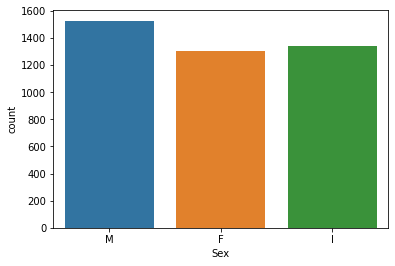

In [ ]:
sns.countplot(x='Sex',data=df)
plt.show()

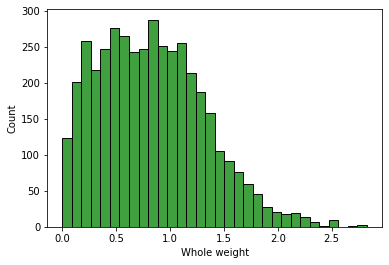

In [ ]:
sns.histplot(df['Whole weight'],color='green')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


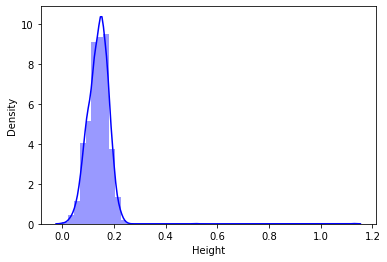

In [ ]:
sns.distplot(df['Height'],color='blue')
plt.show()

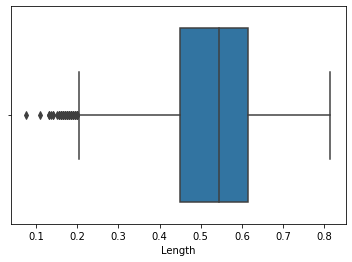

In [ ]:
sns.boxplot(x=df['Length'])
plt.show()



---



### Bi-Variate Analysis

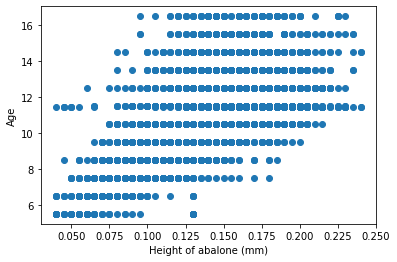

In [ ]:
plt.scatter(df['Height'],df['Age'])
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Age')
plt.show()

In [ ]:
plt.scatter(df['Shucked weight'],df['Age'])
plt.xlabel('Shucked weight of abalone (mm)')
plt.ylabel('Age')
plt.show()

In [ ]:
sns.lineplot(x=df['Age'],y=df['Whole weight'])
plt.show()

In [ ]:
sns.lineplot(x=df['Age'],y=df['Shell weight'])
plt.show()



---



### Multi-Variate Analysis

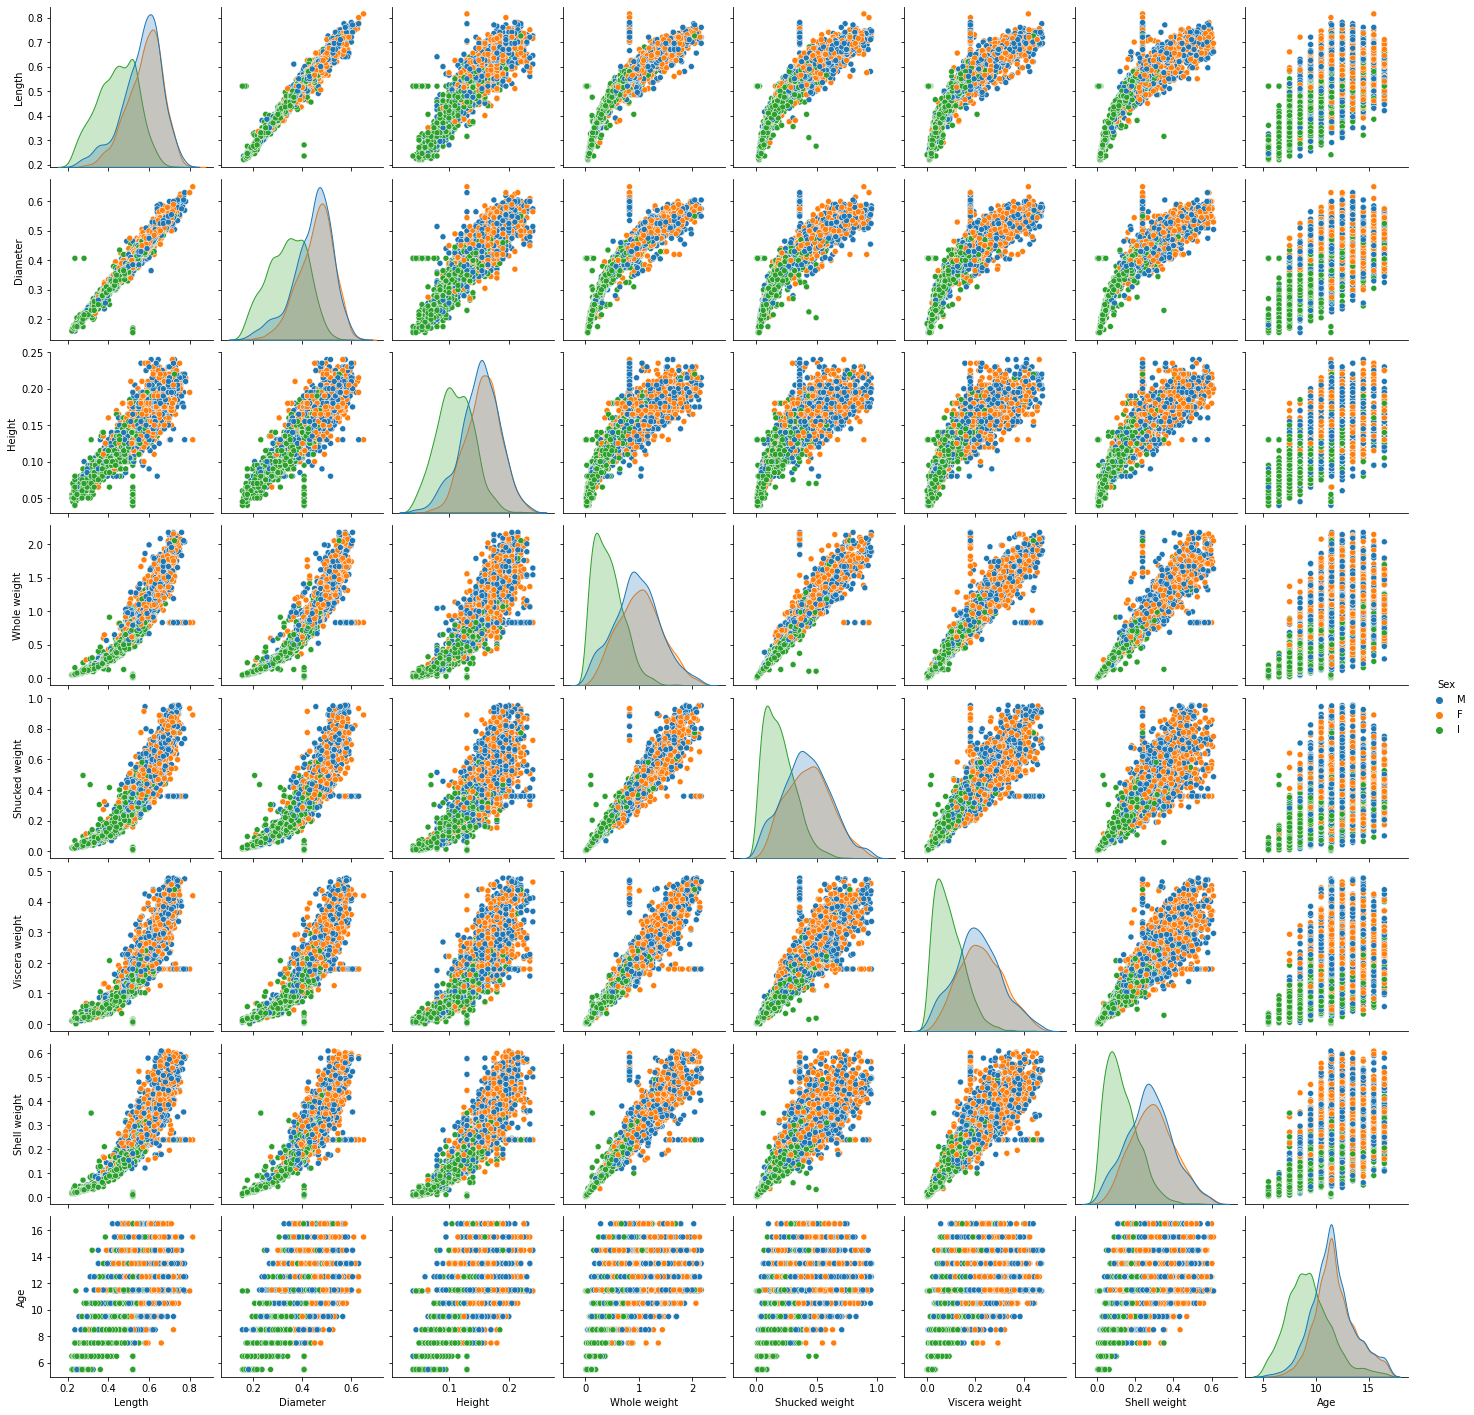

In [ ]:
sns.pairplot(df,hue='Sex')
plt.show()

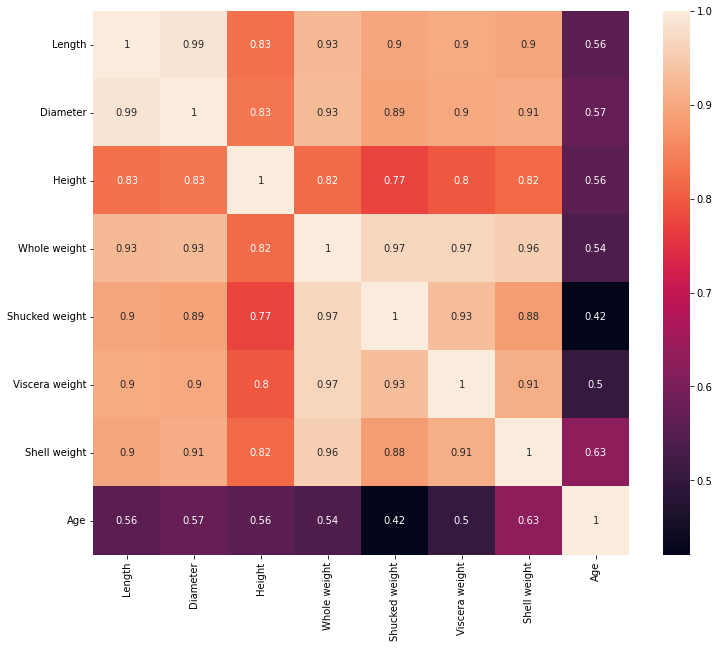

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()



---



## 4.   Descriptive Statistics

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB




---



## 5.   Check for Missing Values and Deal with them

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64



---



## 6.   Find the outliers and Replace them

In [ ]:
col = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
       'Viscera weight', 'Shell weight', 'Age']

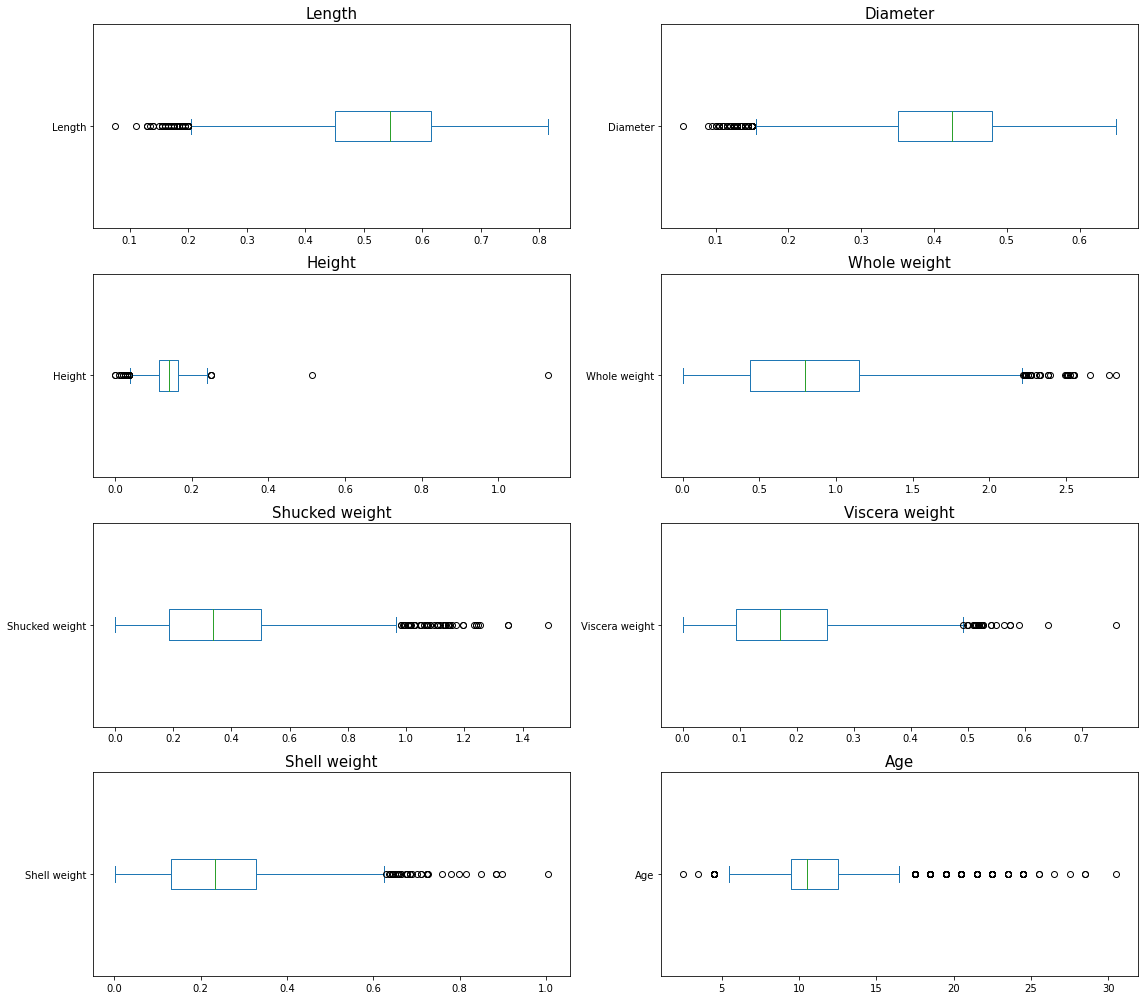

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(16,14))
axes = np.ravel(axes)

for i,c in enumerate(col):
  hist = df[c].plot(kind='box',ax = axes[i],vert = False)
  axes[i].set_title(c,fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
qnt = df.quantile(q=(0.75,0.25))
qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5


In [ ]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Age               3.0000
dtype: float64

In [ ]:
lower = qnt.loc[0.25] - 1.5 * IQR
upper = qnt.loc[0.75] + 1.5 * IQR
print("Lower\n", lower)
print()
print("Upper\n",upper)

Lower
 Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Age               5.00000
dtype: float64

Upper
 Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Age               17.00000
dtype: float64


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Age               11.433684
dtype: float64

In [ ]:
df['Length']=np.where(df['Length']<0.22,0.52,df['Length'])

In [ ]:
df['Diameter']=np.where(df['Diameter']<0.155,0.407,df['Diameter'])

In [ ]:
df['Height']=np.where(df['Height']<0.04,0.13,df['Height'])

In [ ]:
df['Height']=np.where(df['Height']>0.24,0.13,df['Height'])

In [ ]:
df['Whole weight']=np.where(df['Whole weight']>2.18,0.83,df['Whole weight'])

In [ ]:
df['Shucked weight']=np.where(df['Shucked weight']>0.958,0.359367,df['Shucked weight'])

In [ ]:
df['Viscera weight']=np.where(df['Viscera weight']>0.478,0.18,df['Viscera weight'])

In [ ]:
df['Shell weight']=np.where(df['Shell weight']>0.61,0.238831,df['Shell weight'])

In [ ]:
df['Age']=np.where(df['Age']<5.0,11.43,df['Age'])

In [ ]:
df['Age']=np.where(df['Age']>17.0,11.43,df['Age'])

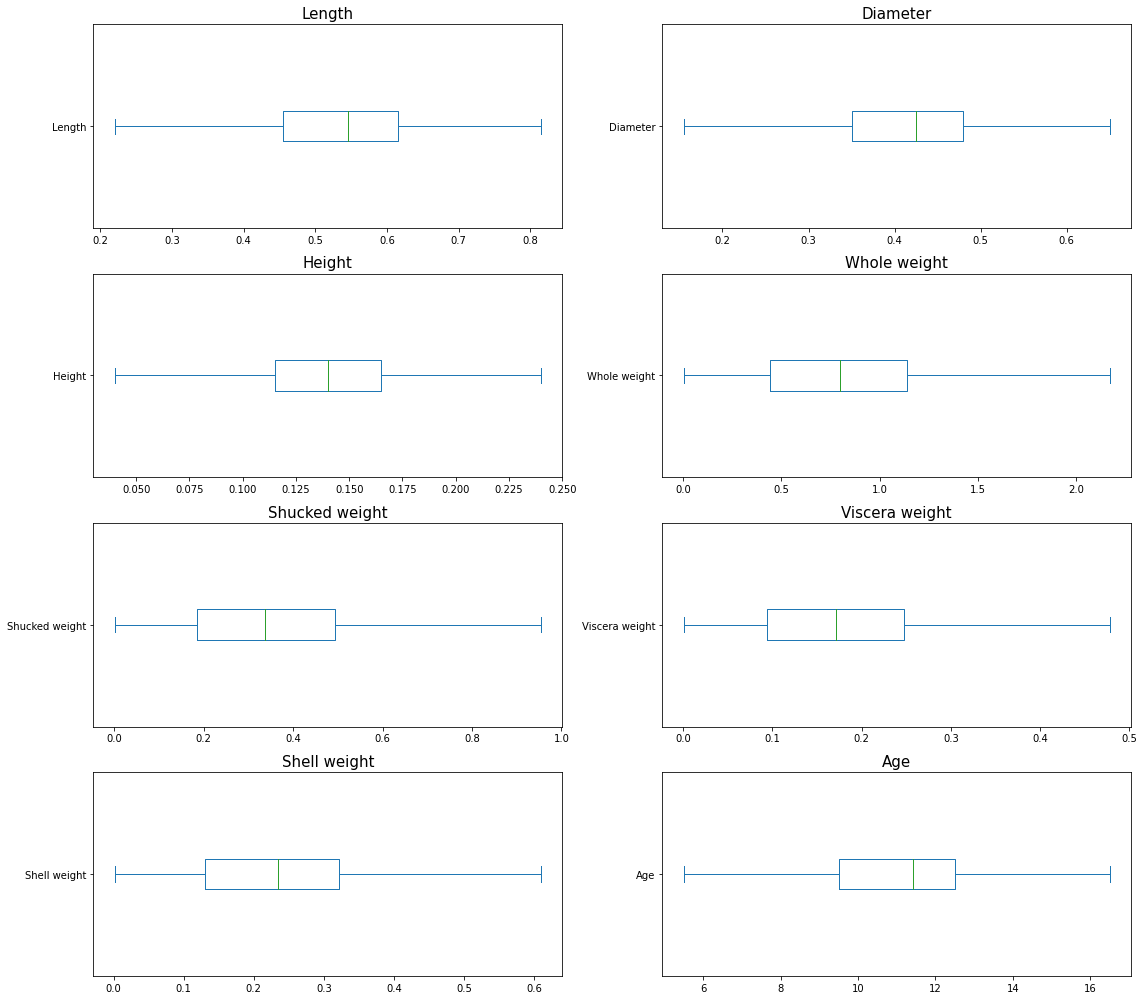

In [ ]:
figfig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i,c in enumerate(col):
  hist = df[c].plot(kind='box',ax = axes[i],vert = False)
  axes[i].set_title(c,fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(4177, 9)



---



## 7.   Check for Categorical columns and Perform Encoding

In [ ]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
x = pd.get_dummies(df)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0




---



## 8.   Split the data into dependent and independent variables

In [ ]:
X = x.drop(['Age'],axis=1)
X.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0,0,1


In [ ]:
y = x['Age']
y.head(2)

0    16.5
1     8.5
Name: Age, dtype: float64



---



## 9.   Scale the independent variables


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_col = X.select_dtypes(include=np.number).columns.tolist()
X_col

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [ ]:
scaler = StandardScaler()

In [ ]:
X[X_col] = scaler.fit_transform(X[X_col])

In [ ]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.663474,-0.501673,-1.196422,-0.643390,-0.611770,-0.732343,-0.643590,-0.674834,-0.688018,1.316677
1,-1.601273,-1.572915,-1.330241,-1.259765,-1.219694,-1.236126,-1.257424,-0.674834,-0.688018,1.316677
2,0.006383,0.087510,-0.125873,-0.295144,-0.456142,-0.343709,-0.183214,1.481846,-0.688018,-0.759488
3,-0.797445,-0.501673,-0.393511,-0.639118,-0.655541,-0.607596,-0.605225,-0.674834,-0.688018,1.316677
4,-1.779901,-1.680039,-1.597878,-1.303563,-1.268328,-1.322489,-1.372518,-0.674834,1.453451,-0.759488




---



## 10.   Split the data into training and testing

In [ ]:
X.shape, y.shape

((4177, 10), (4177,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (2923, 10)
 y_train.shape :  (2923,)
 X_test.shape :  (1254, 10)
 y_test.shape :  (1254,)




---



## 11,12,13.   Build, Train and Test the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_test = model.predict(X_test)



---



## 14.   Measure the performance using metrics

In [ ]:
from sklearn import metrics

In [ ]:
print('Random Forest Contains:')
print('-------------------')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2 Score :',metrics.r2_score(y_test,y_pred_test))

Random Forest Contains:
-------------------
MAE: 1.3112689505513586
MSE: 2.9050588005934643
RMSE: 1.7044233044034174
R2 Score : 0.46406249338074634




---

